In [1]:
from docx import Document
import os
import re
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np


In [2]:
#read the EIAs
blackwater=Document('EIA/Blackwater_Gold_6_7.docx') #set the file path required to each EIA 
cote = Document('EIA/Cote_Section6_Section7.docx')
magino = Document('EIA/Magino_Gold_Chapter_6_7.docx')

In [3]:
# define word extraction function 
def extract_words(document):
    words = []
    for paragraph in document.paragraphs:
        # Extract words using regular expression, considering only alphanumeric characters and hyphens
        words.extend(re.findall(r'\b\w[\w-]*\b', paragraph.text.lower()))
    return words

In [12]:
# Define the new list of keywords for counting in all documents
selected_keywords = [
    'environmental', 'climate', 'emissions', 'freshwater', 
    'groundwater', 'greenhouse', 'natural', 'air', 'waste', 'watersheds'
]

# Function to count occurrences of keywords in a document
def count_keywords(document, keywords):
    word_counts = {keyword: 0 for keyword in keywords}
    words = extract_words(document)
    for word in words:
        for keyword in keywords:
            if keyword in word:
                word_counts[keyword] += 1
    return word_counts

# Count occurrences in all three documents
counts_cote = count_keywords(cote, selected_keywords)
counts_magino = count_keywords(magino, selected_keywords)
counts_blackwater = count_keywords(blackwater, selected_keywords)

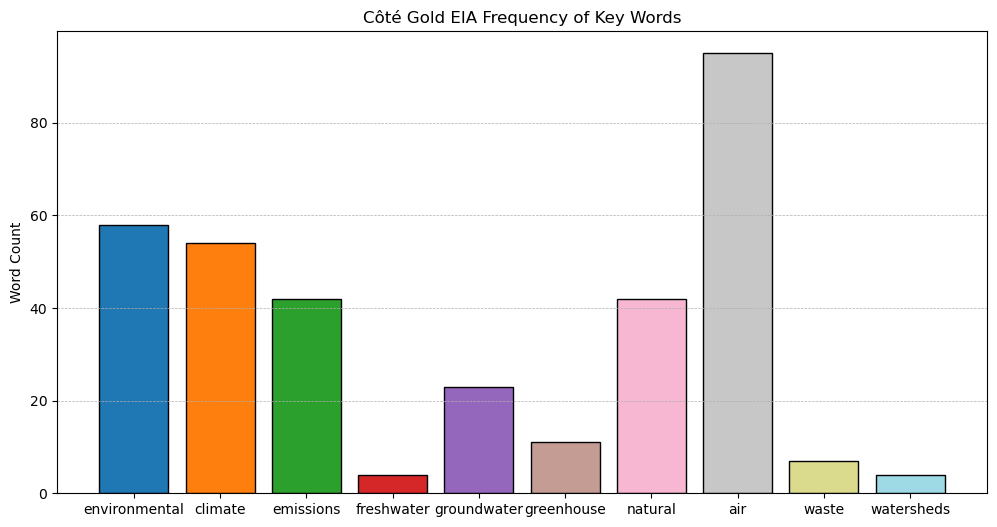

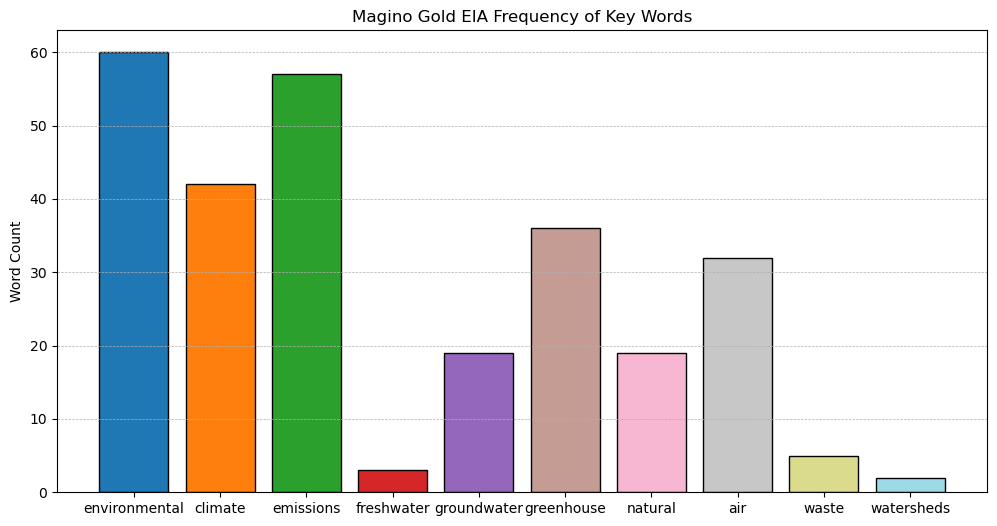

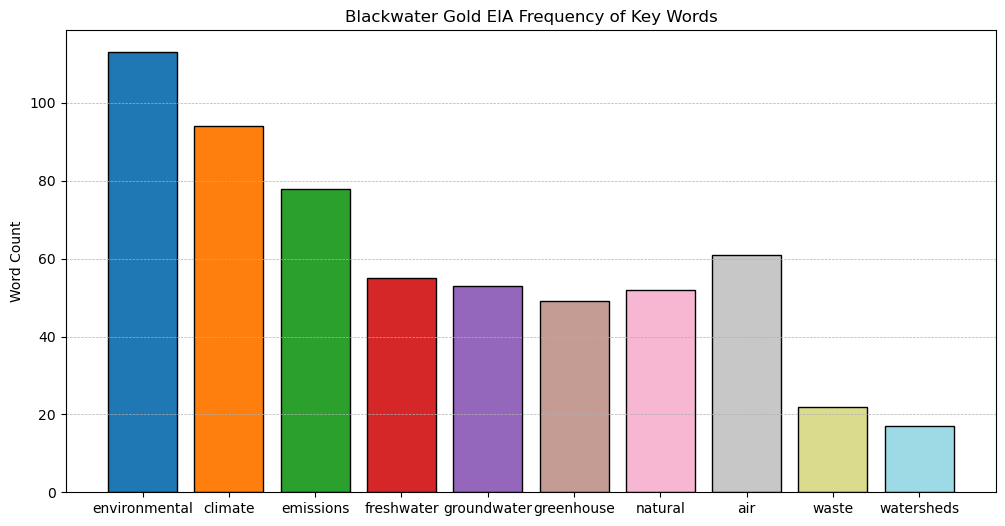

In [13]:
# plot bar chart of the word counts
def plot_word_counts(counts, title):
    colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))
    plt.figure(figsize=(12, 6,), linewidth=2)
    plt.bar(range(len(counts)), list(counts.values()), align='center', color=colors, edgecolor='black',fill = 'w')
    plt.xticks(range(len(counts)), list(counts.keys()))
    plt.ylabel('Word Count')
    plt.title(title)
    plt.grid(which= 'major', axis='y', linestyle='--', linewidth=0.5)
    plt.show()


plot_word_counts(counts_cote, 'Côté Gold EIA Frequency of Key Words')
plot_word_counts(counts_magino, 'Magino Gold EIA Frequency of Key Words')
plot_word_counts(counts_blackwater, 'Blackwater Gold EIA Frequency of Key Words')



In [6]:
# Function to track the position of keywords in the document
def track_keyword_positions(document, keywords):
    positions = {keyword: [] for keyword in keywords}
    current_position = 0
    for paragraph in document.paragraphs:
        for keyword in keywords:
            if keyword in paragraph.text.lower():
                positions[keyword].append(current_position)
        current_position += 1
    return positions

# Track positions of keywords in each document
positions_cote = track_keyword_positions(cote, selected_keywords)
positions_magino = track_keyword_positions(magino, selected_keywords)
positions_blackwater = track_keyword_positions(blackwater, selected_keywords)

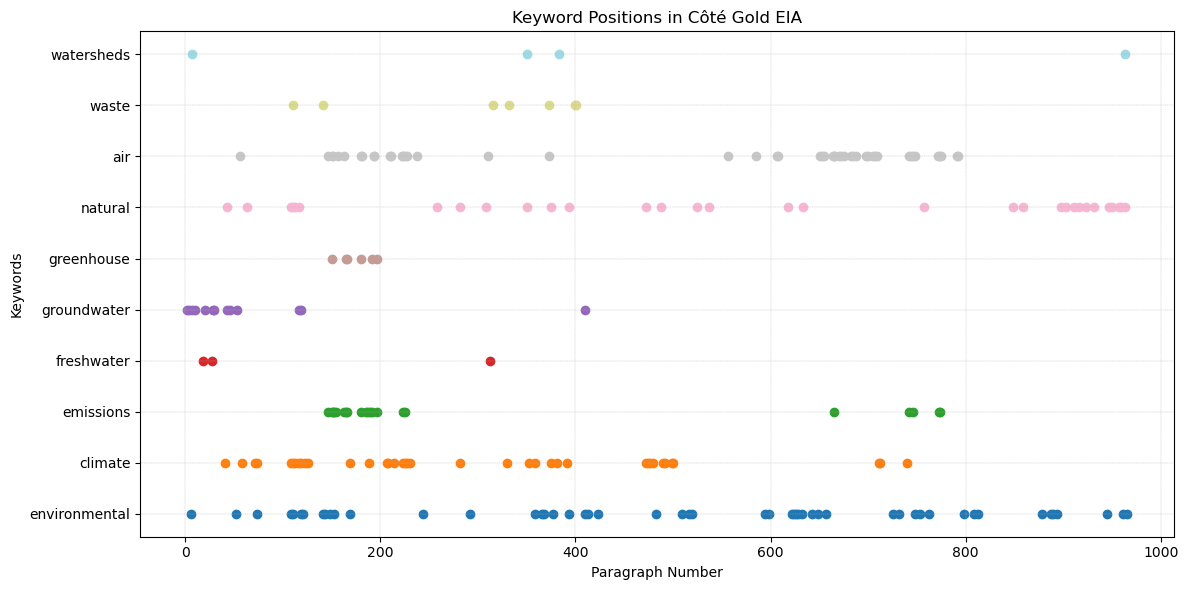

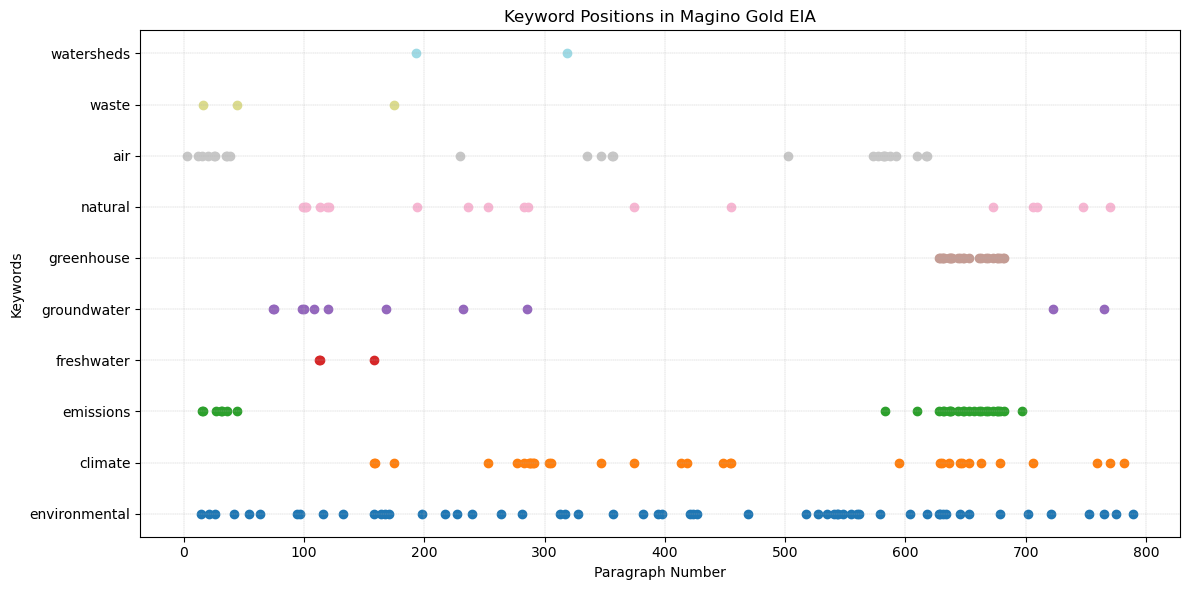

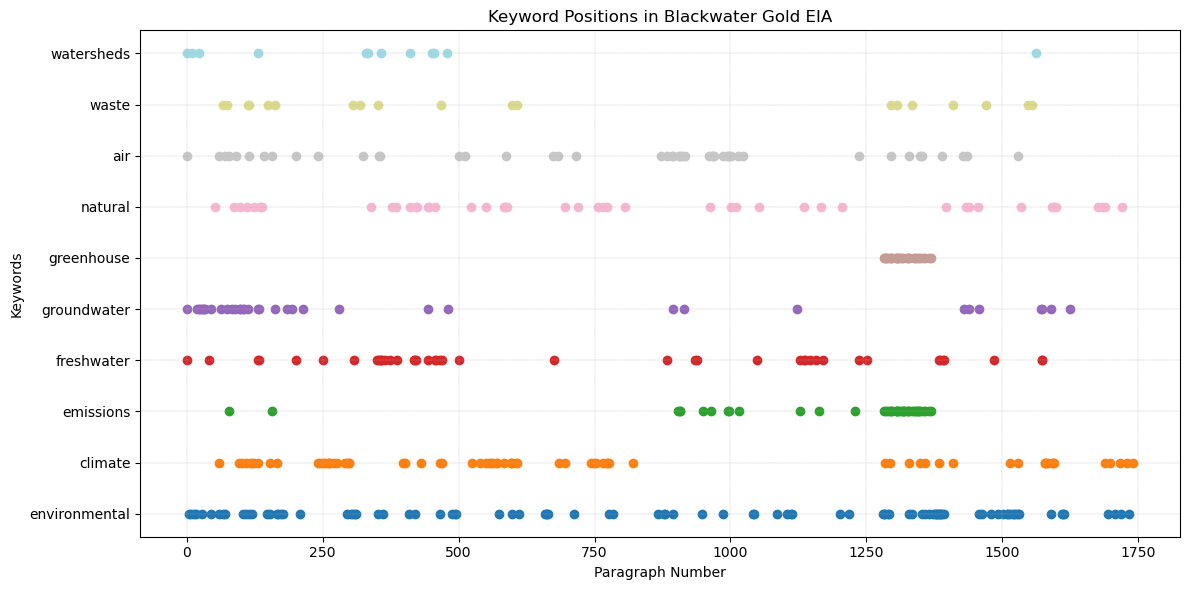

In [7]:
# plotting function for position within document 
def plot_keyword_positions(positions, title):
    plt.figure(figsize=(12, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, len(positions)))  # Generating unique colors
    for i, (keyword, pos_list) in enumerate(positions.items()):
        plt.scatter(pos_list, [keyword] * len(pos_list), color=colors[i], label=keyword)
    plt.xlabel('Paragraph Number')
    plt.ylabel('Keywords')
    plt.title(f'Keyword Positions in {title}')
    #plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adding the ledgent 
    plt.tight_layout()
    plt.grid(which= 'major', linestyle='--', linewidth=0.25)
    plt.show()

# Redo the plots with the improved legend
plot_keyword_positions(positions_cote, "Côté Gold EIA")
plot_keyword_positions(positions_magino, "Magino Gold EIA")
plot_keyword_positions(positions_blackwater, "Blackwater Gold EIA")


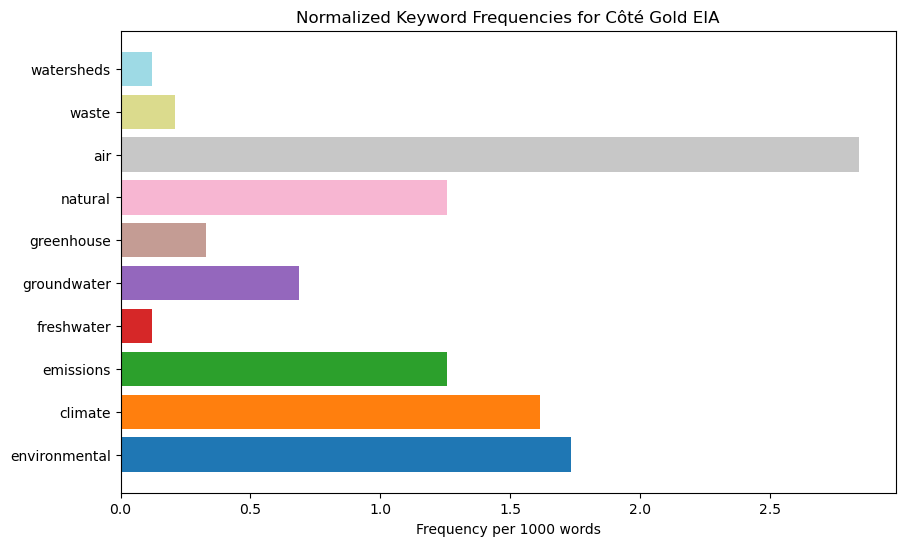

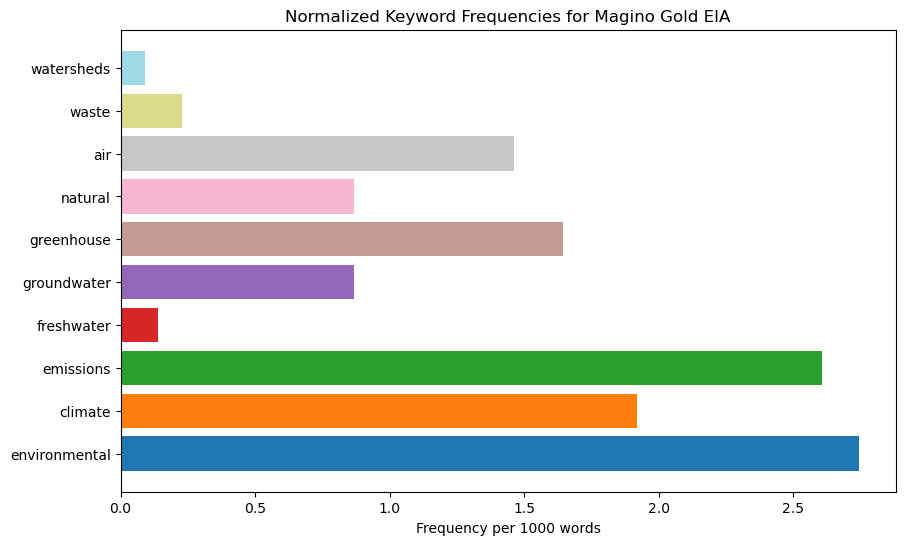

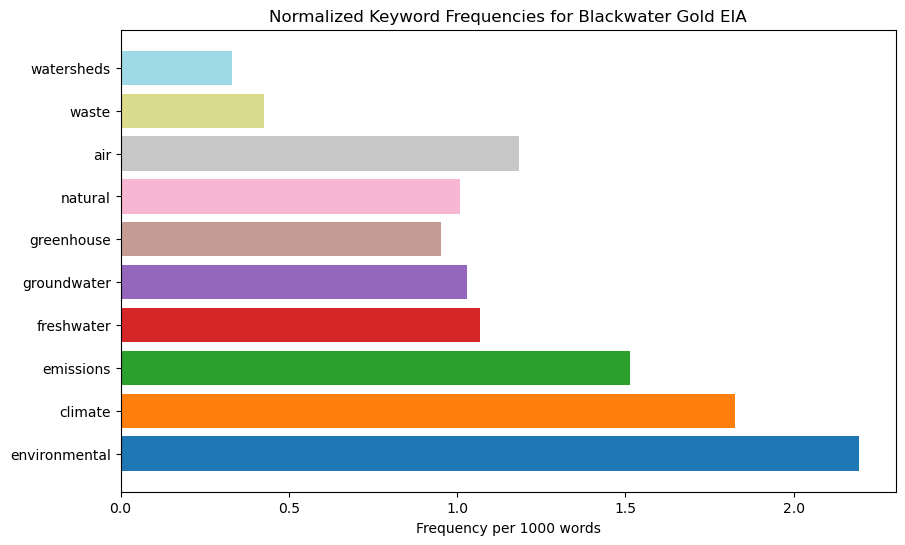

In [16]:
#frequency of keywords in each document
def count_total_words(doc):
    """Count the total number of words in a Word document."""
    total_words = 0
    for paragraph in doc.paragraphs:
        total_words += len(paragraph.text.split())
    return total_words

def count_keywords(doc, keywords):
    """Count the frequency of specified keywords in a Word document."""
    word_counts = {keyword: 0 for keyword in keywords}
    for paragraph in doc.paragraphs:
        for keyword in keywords:
            word_counts[keyword] += paragraph.text.lower().count(keyword.lower())
    return word_counts

def normalize_counts(word_counts, total_words):
    """Normalize the keyword counts per 1000 words."""
    return {keyword: (count / total_words * 1000) for keyword, count in word_counts.items()}

def plot_normalized_counts(normalized_counts, title):
    """Plot the normalized keyword frequencies."""
    keywords = list(normalized_counts.keys())
    frequencies = list(normalized_counts.values())
    color = plt.cm.tab20(np.linspace(0, 1, len(keywords)))

    plt.figure(figsize=(10, 6))
    plt.barh(keywords, frequencies, color=color)
    plt.xlabel('Frequency per 1000 words')
    plt.title(title)
    plt.show()


keywords = ["environmental", "climate", "emissions", "freshwater", "groundwater", "greenhouse", "natural", "air", "waste", "watersheds"]

doc = cote
total_words = count_total_words(doc)
keyword_counts = count_keywords(doc, keywords)
normalized_counts = normalize_counts(keyword_counts, total_words)

plot_normalized_counts(normalized_counts, 'Normalized Keyword Frequencies for Côté Gold EIA')

doc = magino
total_words = count_total_words(doc)
keyword_counts = count_keywords(doc, keywords)
normalized_counts = normalize_counts(keyword_counts, total_words)

plot_normalized_counts(normalized_counts, 'Normalized Keyword Frequencies for Magino Gold EIA')

doc = blackwater
total_words = count_total_words(doc)
keyword_counts = count_keywords(doc, keywords)
normalized_counts = normalize_counts(keyword_counts, total_words)

plot_normalized_counts(normalized_counts, 'Normalized Keyword Frequencies for Blackwater Gold EIA')